In [10]:
import pandas as pd

greed_file_name = "Greed_index.csv"
historical_file_name = "historical_data.csv"
merged_file_name = "merged_data.csv"

greed_df = pd.read_csv('csv_files\Greed_index.csv')
historical_df = pd.read_csv('csv_files\historical_data.csv')

greed_df = greed_df.rename(columns={'date': 'formatted_date'})
greed_df = greed_df[['formatted_date', 'value', 'classification']]

historical_df['formatted_date'] = historical_df['Timestamp IST'].str.split(' ').str[0]
historical_df['formatted_date'] = pd.to_datetime(historical_df['formatted_date'], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')

merged_df = pd.merge(historical_df, greed_df, on='formatted_date', how='left')

merged_df = merged_df.drop(columns=['formatted_date'])

print(f"Data successfully merged into '{merged_file_name}' using pandas.")


Data successfully merged into 'merged_data.csv' using pandas.


In [11]:
df= pd.read_csv('csv_files\merged_data.csv')

In [12]:
df.drop(columns=['Account','Coin','Timestamp IST','Transaction Hash','Order ID','Trade ID','Timestamp'], inplace=True, axis=1)
Direction_mapping = {
    'Buy': 1,
    'Sell': -1
}
df['Direction'] = df['Direction'].map(Direction_mapping)
df['Closed PnL'] = df['Closed PnL'].astype(float)
df.head()
classification_mapping = {
    'Extreme Fear': -2,
    'Fear': -1,
    'Neutral': 0,
    'Greed': 1,
    'Extreme Greed': 2
}

# Now, use the .map() method to apply this mapping to the 'classification' column.
df['classification'] = df['classification'].map(classification_mapping)

# The new 'classification_numeric' column will contain the numerical values.
print(df.head())

   Execution Price  Size Tokens  Size USD Side  Start Position  Direction  \
0           7.9769       986.87   7872.16  BUY        0.000000        1.0   
1           7.9800        16.00    127.68  BUY      986.524596        1.0   
2           7.9855       144.09   1150.63  BUY     1002.518996        1.0   
3           7.9874       142.98   1142.04  BUY     1146.558564        1.0   
4           7.9894         8.73     69.75  BUY     1289.488521        1.0   

   Closed PnL  Crossed       Fee  value  classification  
0         0.0     True  0.345404   80.0             2.0  
1         0.0     True  0.005600   80.0             2.0  
2         0.0     True  0.050431   80.0             2.0  
3         0.0     True  0.050043   80.0             2.0  
4         0.0     True  0.003055   80.0             2.0  


In [15]:
df.drop(columns=['Crossed','Side'], inplace=True, axis=1)

In [19]:
df.columns
df=df.to_csv('csv_files\Clean_merged_data.csv', index=False)

In [21]:
df= pd.read_csv('csv_files\Clean_merged_data.csv')

In [22]:
df.isnull().sum()

Execution Price         0
Size Tokens             0
Size USD                0
Start Position          0
Direction          174606
Closed PnL              0
Fee                     0
value                   6
classification          6
dtype: int64

In [23]:
df.drop(columns=['Direction'], inplace=True, axis=1)

In [24]:
df.isnull().sum()

Execution Price    0
Size Tokens        0
Size USD           0
Start Position     0
Closed PnL         0
Fee                0
value              6
classification     6
dtype: int64

In [25]:
mode_value = df['classification'].mode()[0]
df['classification'].fillna(mode_value, inplace=True)
df.isnull().sum()

C:\Users\giris\AppData\Local\Temp\ipykernel_5396\2902477046.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['classification'].fillna(mode_value, inplace=True)


Execution Price    0
Size Tokens        0
Size USD           0
Start Position     0
Closed PnL         0
Fee                0
value              6
classification     0
dtype: int64

In [26]:
mode_value = df['value'].mode()[0]
df['value'].fillna(mode_value, inplace=True)
df.isnull().sum()

C:\Users\giris\AppData\Local\Temp\ipykernel_5396\3725544058.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['value'].fillna(mode_value, inplace=True)


Execution Price    0
Size Tokens        0
Size USD           0
Start Position     0
Closed PnL         0
Fee                0
value              0
classification     0
dtype: int64

In [27]:
df.to_csv('csv_files\Clean_merged_data.csv', index=False)

In [28]:
df1= pd.read_csv('csv_files\Clean_merged_data.csv')
df1.isnull().sum()

Execution Price    0
Size Tokens        0
Size USD           0
Start Position     0
Closed PnL         0
Fee                0
value              0
classification     0
dtype: int64

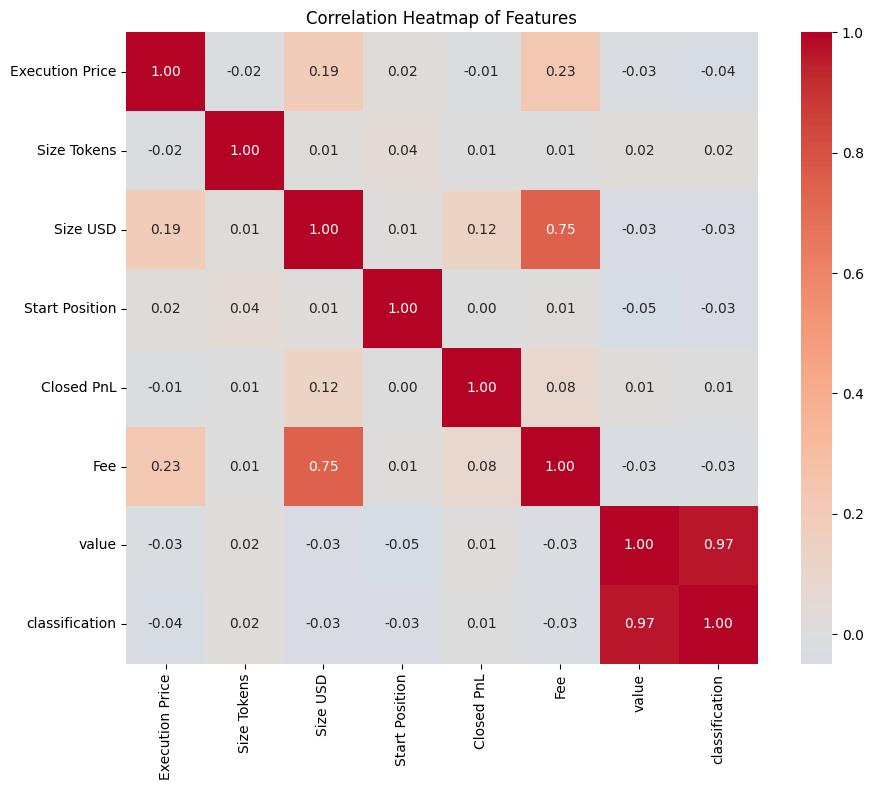

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix
correlation_matrix = df1.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Format correlation values to 2 decimal places
            square=True)  # Make the plot square-shaped

plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()